<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_06_ClasificacionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificacion Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos medicos, astrofisicos se pueden aplicar algoritmos de clasificación. En particular en esta sesión se estudia los principios basicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos basado en dos características:



In [120]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

Text(0, 0.5, 'X_2')

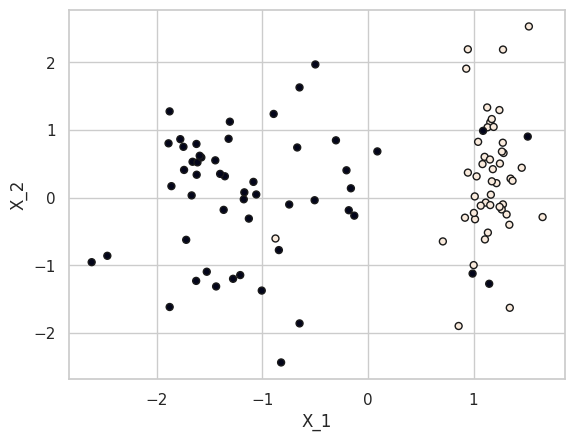

In [121]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de lods  sistemas basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



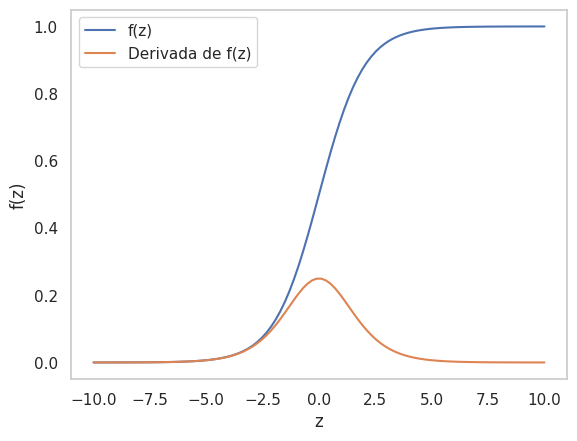

In [122]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, así:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desicion entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos que los parametros $\Theta$ entonces podemos definir la frontera de clasifiación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Ecnontrar la ecuacion de la recta y mejorar la parametrizacion

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [123]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

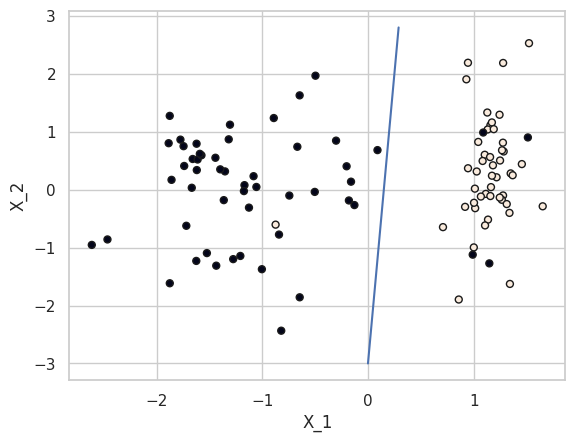

In [124]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Fronteras no lineal también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como funcion de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenmos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(np.float64(-1.12244940477901),
 np.float64(1.1839643638442499),
 np.float64(-1.2696420440360447),
 np.float64(1.185918477713659))

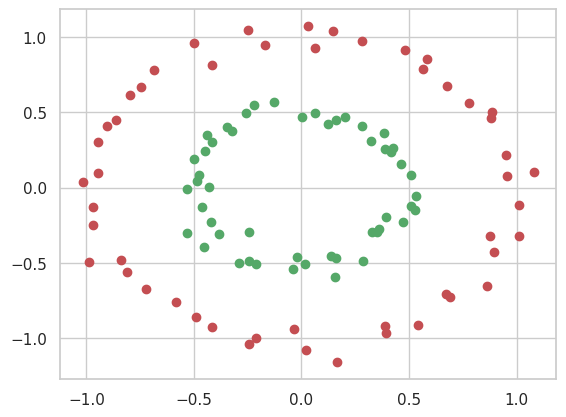

In [125]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

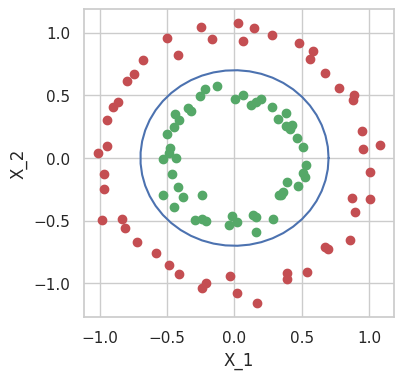

In [126]:
#Por motivos graficos transformemos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser elegidos los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T (X)}}
\end{equation}



Para ello, podemos definir la función de coste como :


\begin{equation}
J = \left \{
  \begin{array}{ c l }
    -\log h(x) & \quad \textrm{if } y = 1 \\
    -\log (1-h(x))  & \quad \textrm{if } y = 0 \\
  \end{array}
\right.
\end{equation}



Resumida en la siguiente expresión:


$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadose para la regresión logistica de acuerdo a la teoría de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, se cumple que cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimizacion  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada mas adelante segun la teoria de la probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimizacion permite encontrar los valores de $\theta$ despues de un conjunto determinado de itereaciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minizacion podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


# Interpretación probabilística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresion logistica?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los mas probables es decir que para encontrar los valores de $\theta$ que nos garantizan la maxima probabilidad es necesario maximar la función anterior. Despues de realizar los calculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





# Regularización


## Regresion Lineal
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



### Normal equation
\begin{equation}
\theta=(X^TX\lambda L)^{-1} X^T y
\end{equation}

\begin{equation}
\lambda=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}

Las dimensiones de $[\lambda]=(\mathrm{n+1}) \times (\mathrm{n+1})$



## Regresion Logistica
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



# Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$


Estrategia de solución.

1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset
```
print(iris.DESCR)
```
2. Construye un dataframe:
- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.


3. Cambia el nombre de las columnas del dataframe, empleando intrucción como:
```
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]
```


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion


6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:
```
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
```
¿Cómo se estan seprando los datos?


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.


9. Determine  la frontera de clasificación:
```
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)#Generamos los valores de X_new
prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary
```


10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad


11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.


12. Dado X = [4.9,5.0, 1.8, 0.3] asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?




Ayudas para mejorar las metricas:


- Normalizar cada columna respecto a su media y desviacion estandar

```
(x-mean(x))/std(x)
```

- Determinar los datos outlier

- Construir curvas de aprendizaje

# [SOFTMAX REGRESION](https://es.wikipedia.org/wiki/Funci%C3%B3n_SoftMax)


La elección anterior es conocida com softmax regresión, que permite definir un conjunto de probabilidades asociadas a un conjunto de clases. Al definir el maximo valor de la probabilidad dado un conjunto de inputs se tiene el objeto que predice el modelo, una forma de hacer una implementación rapida es mostrada a continuación.

[Referencias]  [Hand on Machine learning](https://  github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)


# Reto, no es obligatorio.

### Clasificación de pulsar.

Para el siguiente  dataset descrito en el este enlace [pulsar](https://archive.ics.uci.edu/ml/datasets/HTRU2)  , construir un clasificador logístico, para ello, deberá primera entender las caracteristicas del problema y seguidamente estudiar el comportamiento de la clasificacion realizada.


1. Dividir los datos en train and test
2. Entrenar el algoritmo.
3. Analizar las curvas de aprendizaje.
4. Realizar Predicciones
5. Aplicar regularización.


Referencias

[1] http://cs229.stanford.edu/syllabus.html

[2] https://www.coursera.org/learn/machine-learning. Week 3.

[3] https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py


[4]https://scikit-learn.org/stable/datasets/toy_dataset.html

In [147]:
# Librerías 

# --- MANEJO DE DATOS ---
import pandas as pd
import numpy as np  

# --- ISUALIZACIÓN ---
import matplotlib.pyplot as plt
import seaborn as sns  

# --- MACHINE LEARNING ---
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

# --- CONFIGURACIONES DEL NOTEBOOK ---
# Permite ver los gráficos directamente en la celda
%matplotlib inline 

# Estilo visual limpio para los gráficos (cuadrícula suave)
sns.set(style="whitegrid", context="notebook") 

# Para que pandas no oculte columnas si el dataset crece
pd.set_option('display.max_columns', None)

In [128]:
# 1. Cargar el conjunto de datos Iris

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [129]:
# 2. Construir el DataFrame

# Verificamos las claves disponibles en el dataset 
print(f"Claves disponibles: {iris.keys()}\n")

# Creamos el DataFrame con los datos y nombres de columnas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregamos la columna 'target' al DataFrame
df['target'] = iris.target

Claves disponibles: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])



In [130]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [131]:
# 3. Cambiar el nombre de las columnas

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols

In [132]:
df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [133]:
# 4. Analisis exploratorio de los datos

print("--- DIMENSIONES Y ESTRUCTURA ---")
df.info()

print("\n--- CHEQUEO DE CALIDAD ---")
print(f"Filas duplicadas: {df.duplicated().sum()}")
print(f"Valores nulos totales: {df.isnull().sum().sum()}")

print("\n--- ESTADÍSTICAS (Transpuesta para mejor lectura) ---")
# La 'T' invierte la tabla. Ayuda mucho visualmente.
print(df.describe().T)

print("\n--- BALANCE DE CLASES (Target) ---")
# Esto nos dice si el dataset está equilibrado (ej: 50 de cada flor)
print(df['Target'].value_counts())

--- DIMENSIONES Y ESTRUCTURA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

--- CHEQUEO DE CALIDAD ---
Filas duplicadas: 1
Valores nulos totales: 0

--- ESTADÍSTICAS (Transpuesta para mejor lectura) ---
                count      mean       std  min  25%   50%  75%  max
SepalLength_cm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidth_cm   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
PetalLength_cm  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
PetalWidth_cm   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
Target          150.0  1.00000

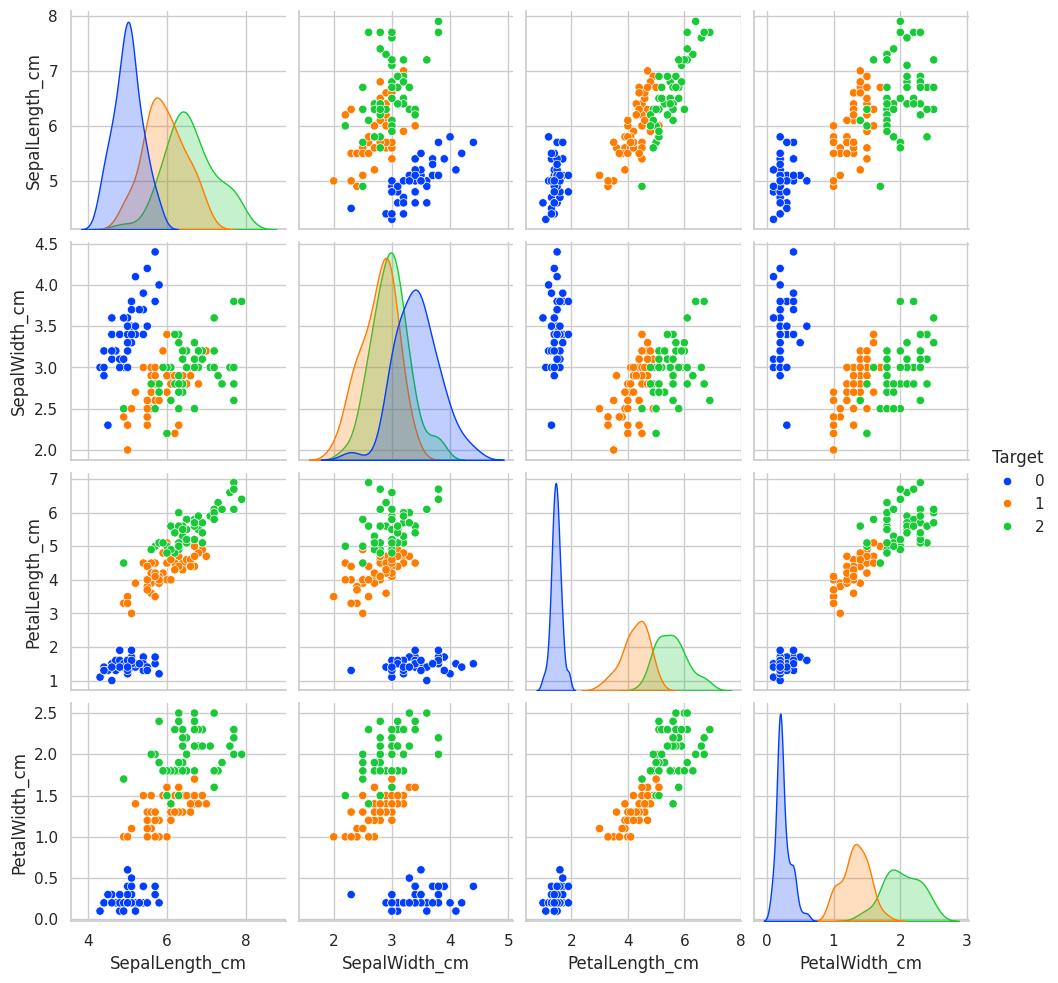

In [134]:
# 5. Estadística y Gráficas Básicas

# Gráfica para entender el dataset (Pairplot)
# 'hue' colorea según la clase para ver cómo se separan
sns.pairplot(df, hue='Target', palette='bright')
plt.show()

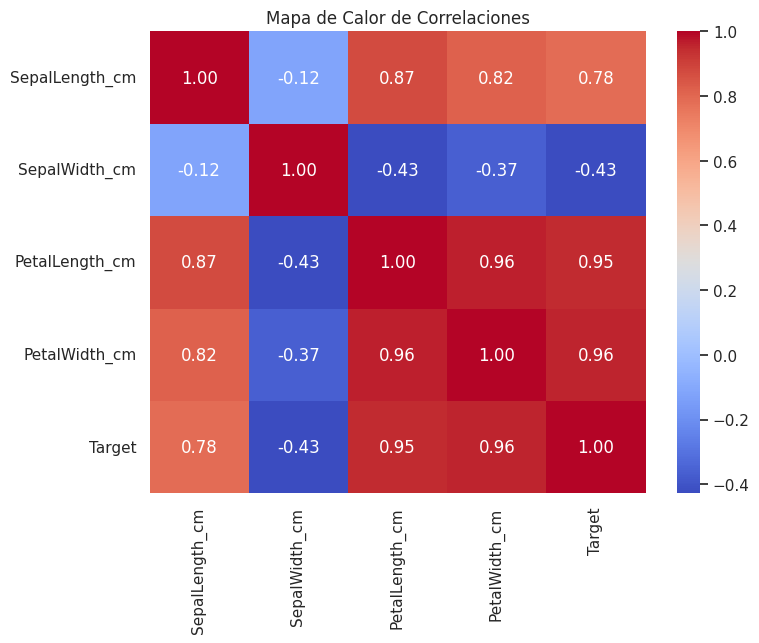

In [135]:
# 6. Matriz de Correlación y Heatmap 

# Calcular la correlación 
matriz_corr = df.corr()

# Graficar el Heatmap 
plt.figure(figsize=(8, 6))


sns.heatmap(matriz_corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")

plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [136]:
# 7. División Estratificada de Datos

# Configuración del Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Ejecución del Split
for train_index, test_index in split.split(df, df["Target"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# Verificación rápida
print(f"Datos de Entrenamiento: {len(strat_train_set)} filas")
print(f"Datos de Prueba: {len(strat_test_set)} filas")

Datos de Entrenamiento: 120 filas
Datos de Prueba: 30 filas


**¿Cómo se están separando los datos?**

Los datos se separan mediante **Muestreo Estratificado** (`StratifiedShuffleSplit`), una estrategia que garantiza mantener la **misma proporción de clases** del dataset original en los conjuntos de entrenamiento y prueba, evitando el sesgo de muestreo. Se configura con `test_size=0.2` para reservar el 20% a validación, `random_state=42` para asegurar la reproducibilidad, y `n_splits=1` para generar **una única partición** (una sola iteración de barajado y corte), asegurando que el modelo vea ejemplos representativos de todas las especies.

In [137]:
# 8. Preparación de datos (Feature Engineering simple)
# Usamos .copy() para evitar advertencias de pandas (SettingWithCopyWarning)
X_train = strat_train_set.drop("Target", axis=1).copy()
y_train = strat_train_set["Target"].copy()

# Transformamos el problema a BINARIO: 1 si es Setosa, 0 si no lo es
y_train_setosa = (y_train == 0).astype(int) 

# 2. Instanciación del Modelo Pro
# random_state=42 asegura que el entrenamiento sea reproducible
# solver='lbfgs' es el estándar moderno para este tipo de problemas
model_setosa = LogisticRegression(solver='lbfgs', random_state=42)

# 3. Entrenamiento (Fitting)
model_setosa.fit(X_train, y_train_setosa)

# 4. Chequeo de Salud del Modelo (Accuracy en Train)
train_score = model_setosa.score(X_train, y_train_setosa)
print(f"Modelo entrenado para detectar 'Iris-Setosa'.")
print(f"Precisión en el set de entrenamiento: {train_score:.4f} (1.0 = 100%)")

Modelo entrenado para detectar 'Iris-Setosa'.
Precisión en el set de entrenamiento: 1.0000 (1.0 = 100%)


In [138]:
# 9. Entrenamos 
X_train_width = strat_train_set[["PetalWidth_cm"]]
y_train_setosa = (strat_train_set["Target"] == 0).astype(int)

log_reg_1d = LogisticRegression()
log_reg_1d.fit(X_train_width, y_train_setosa)

# GENERAR NUEVOS DATOS
val_x = np.linspace(0, 3, 1000).reshape(-1, 1)

# Convertimos los números sueltos en un DataFrame con el MISMO NOMBRE de columna
X_new = pd.DataFrame(val_x, columns=["PetalWidth_cm"])

# CALCULAR PROBABILIDADES
y_proba = log_reg_1d.predict_proba(X_new)

# ENCONTRAR LA FRONTERA
decision_boundary = X_new.values[y_proba[:, 0] >= 0.5][0]

print(f"Frontera de decisión real: {decision_boundary[0]:.2f} cm")

Frontera de decisión real: 0.76 cm


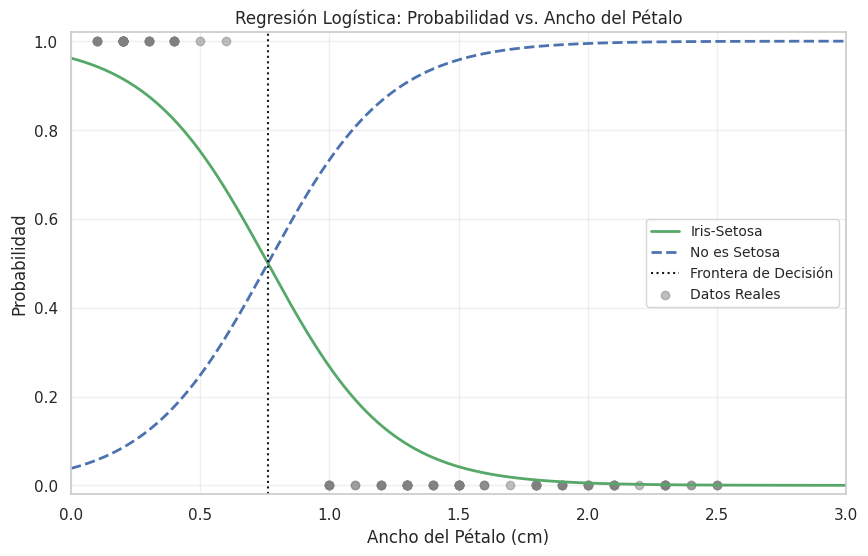

In [139]:
# 10. Gráfica de Probabilidades y Frontera de Decisión

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# DIBUJAR LAS CURVAS DE PROBABILIDAD
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Setosa")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="No es Setosa")

# DIBUJAR LA FRONTERA DE DECISIÓN
# Agregamos [0] para sacar el número del array, o usamos .item()
# Si decision_boundary es algo como [0.8], esto extrae el 0.8 puro.
try:
    boundary_value = decision_boundary.item()
except:
    boundary_value = decision_boundary[0]

plt.axvline(x=boundary_value, color='k', linestyle=':', label="Frontera de Decisión")

# DIBUJAR LOS DATOS REALES
plt.scatter(X_train_width, y_train_setosa, marker='o', color='gray', alpha=0.5, label="Datos Reales")

# DETALLES ESTÉTICOS
plt.xlabel("Ancho del Pétalo (cm)", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.legend(loc="center right", fontsize=10)
plt.title("Regresión Logística: Probabilidad vs. Ancho del Pétalo")
plt.axis([0, 3, -0.02, 1.02]) 
plt.grid(True, alpha=0.3)

plt.show()

In [140]:
# 11. Modelo Multiclasificador (Softmax Regression)

# PREPARAR DATOS 
X_train_full = strat_train_set.drop("Target", axis=1)
y_train_full = strat_train_set["Target"]

# CONSTRUIR EL MODELO 
softmax_reg = LogisticRegression(solver='lbfgs', C=10, max_iter=1000, random_state=42)

# ENTRENAR
softmax_reg.fit(X_train_full, y_train_full)

print("¡Modelo Multiclasificador entrenado exitosamente!")

# Verificación rápida:
print(f"Número de clases detectadas: {len(softmax_reg.classes_)} (Deberían ser 3)")
print(f"Score en entrenamiento: {softmax_reg.score(X_train_full, y_train_full):.4f}")

¡Modelo Multiclasificador entrenado exitosamente!
Número de clases detectadas: 3 (Deberían ser 3)
Score en entrenamiento: 0.9750


In [141]:
# Diagnóstico de Overfitting

# Preparamos los datos de PRUEBA (Test)
X_test_full = strat_test_set.drop("Target", axis=1)
y_test_full = strat_test_set["Target"]

# Hacemos predicciones con el modelo ya entrenado
y_pred_final = softmax_reg.predict(X_test_full)

# Calculamos la precisión final
test_score = accuracy_score(y_test_full, y_pred_final)

print(f"--- DIAGNÓSTICO DE OVERFITTING ---")
print(f"Score en Entrenamiento: {softmax_reg.score(X_train_full, y_train_full):.4f}")
print(f"Score en Prueba (Test): {test_score:.4f}")

difference = softmax_reg.score(X_train_full, y_train_full) - test_score
print(f"Diferencia (Gap): {difference:.4f}")

--- DIAGNÓSTICO DE OVERFITTING ---
Score en Entrenamiento: 0.9750
Score en Prueba (Test): 1.0000
Diferencia (Gap): -0.0250


In [150]:
#12. Predicción de una nueva flor

# --- PREPARAR LOS DATOS ---
X_train_full = strat_train_set.drop("Target", axis=1)
y_train_full = strat_train_set["Target"]

# --- NORMALIZAR ---
# Instanciamos el escalador
scaler = StandardScaler()

# "Ajustamos" (calculamos media y desviación) y transformamos los datos de entrenamiento
# Esto aplica internamente: z = (x - u) / s
X_train_scaled = scaler.fit_transform(X_train_full)

# --- RE-ENTRENAR EL MODELO CON DATOS NORMALIZADOS ---
softmax_reg_scaled = LogisticRegression(solver='lbfgs', C=10, random_state=42)
softmax_reg_scaled.fit(X_train_scaled, y_train_full)

print(f"Nuevo Score con datos normalizados: {softmax_reg_scaled.score(X_train_scaled, y_train_full):.4f}")

# --- PREPARAR LA NUEVA FLOR ---
new_flower_values = [[4.9, 5.0, 1.8, 0.3]]
columns = ["SepalLength_cm", "SepalWidth_cm", "PetalLength_cm", "PetalWidth_cm"]
X_new_flower = pd.DataFrame(new_flower_values, columns=columns)
X_new_scaled = scaler.transform(X_new_flower)

# --- PREDICCIÓN FINAL ---
probs = softmax_reg_scaled.predict_proba(X_new_scaled)
prediction = softmax_reg_scaled.predict(X_new_scaled)
species_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}

print("\n--- RESULTADO DE LA PREDICCIÓN (MODELO NORMALIZADO) ---")
print(f"Probabilidad Setosa:     {probs[0][0]*100:.4f} %")
print(f"Probabilidad Versicolor: {probs[0][1]*100:.4f} %")
print(f"Probabilidad Virginica:  {probs[0][2]*100:.4f} %")
print(f"Clasificación: {species_map[prediction[0]]}")

Nuevo Score con datos normalizados: 0.9750

--- RESULTADO DE LA PREDICCIÓN (MODELO NORMALIZADO) ---
Probabilidad Setosa:     99.9997 %
Probabilidad Versicolor: 0.0003 %
Probabilidad Virginica:  0.0000 %
Clasificación: Setosa


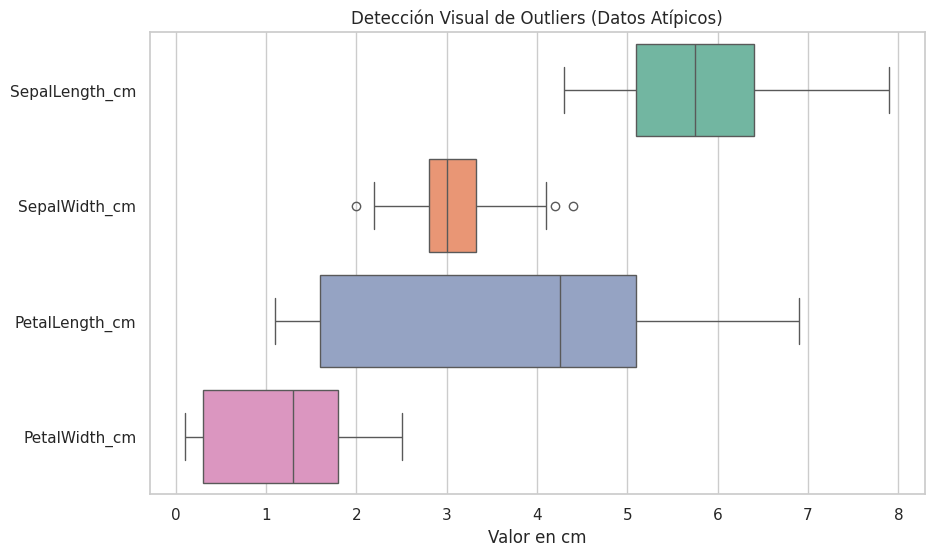

In [148]:
# Usamos el dataset original (strat_train_set) para ver los datos crudos
plt.figure(figsize=(10, 6))

# Creamos un Boxplot.
# Si ves puntitos negros "flotando" lejos de las cajas de colores, esos son outliers.
sns.boxplot(data=strat_train_set.drop("Target", axis=1), orient="h", palette="Set2")

plt.title("Detección Visual de Outliers (Datos Atípicos)")
plt.xlabel("Valor en cm")
plt.show()

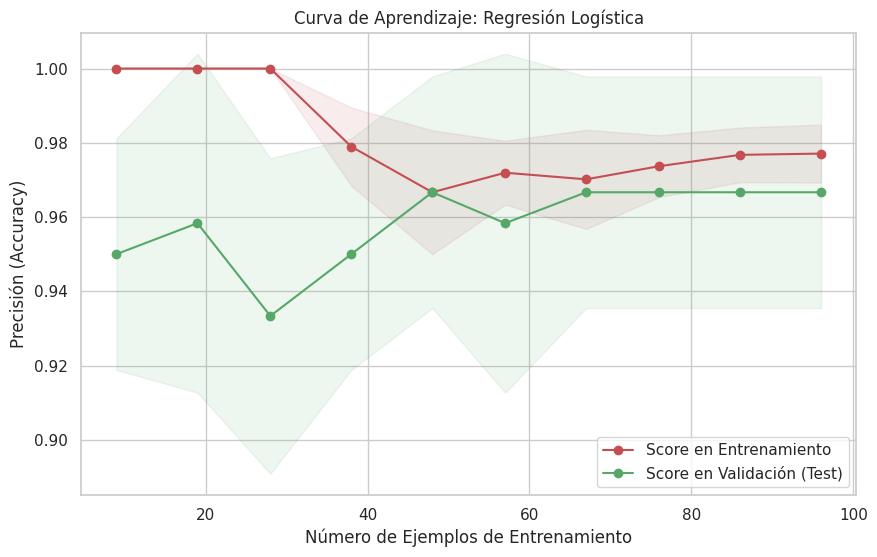

In [149]:
# Configuración de la curva
train_sizes, train_scores, test_scores = learning_curve(
    softmax_reg_scaled,       # modelo normalizado
    X_train_scaled,           # datos X normalizados
    y_train_full,             # etiquetas Y
    cv=5,                     # validación cruzada de 5 pliegues
    scoring="accuracy",       # métrica: Precisión
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10) # Probar con el 10%... hasta el 100% de datos
)

# Calculamos promedios y desviación para graficar bonito (con sombritas)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# GRÁFICA
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Score en Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Score en Validación (Test)")

# Rellenar el espacio entre la desviación 
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje: Regresión Logística")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.show()